## Introduction to OpenCV

The OpenCV library provides functionality for face detection in images. The technique used is based on Haar cascades, which is a machine learning approach. In this project, we will treat OpenCV as a black box, leveraging its pre-trained models for detecting faces, eyes, and smiles.

While OpenCV provides the flexibility to train custom models for detecting various objects, our primary objective in this project is to use the existing classifiers and explore their capabilities in detecting interesting portions of an image.

### Single Face Detection

OpenCV supports reading of images in most file formats, such as JPEG, PNG, and TIFF. Most image and video analysis requires converting images into grayscale first. This simplifies the image and reduces noise allowing for improved analysis. Let's write some code that reads an image of as person, Floyd Mayweather and converts it into greyscale.

In [1]:
# Import OpenCV library
import cv2 as cv

# Load image
image = cv.imread('images/floyd.jpg')
# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Lets inspect the image
print(type(gray_image))

<class 'numpy.ndarray'>


We see that it is of type ndarray, which is a fundamental list type coming from the numerical python project. OpenCV wants to represent an image as a two dimensional sequence of bytes, and the ndarray, which stands for n dimensional array, is the ideal way to do this. Lets look at the array contents.

In [2]:
gray_image

array([[ 40,  39,  39, ...,  77,  76,  75],
       [ 43,  42,  42, ...,  76,  75,  75],
       [ 39,  39,  39, ...,  76,  75,  74],
       ...,
       [ 21,  22,  24, ..., 219, 223, 209],
       [ 18,  20,  22, ..., 196, 206, 196],
       [ 16,  18,  20, ..., 168, 182, 176]], dtype=uint8)

The array is shown here as a list of lists, where the inner lists are filled with integers.The dtype=uint8 definition indicates that each of the items in an array is an 8 bit unsigned integer, which is very common for black and white images. So this is a pixel by pixel definition of the image.

The display package, however, doesn't know what to do with this image. So lets convert it into a PIL object to render it in the browser.

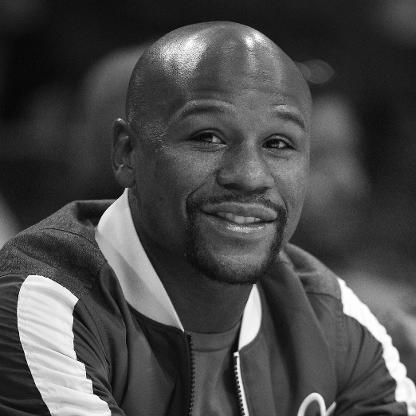

In [3]:
# Import PIL library
from PIL import Image

# Convert to PIL image
pil_image = Image.fromarray(gray_image)
# Display image
display(pil_image)

Let's now use OpenCV to detect faces in this image. OpenCV provides a pre-trained classifier, called the Haar Cascade classifier, which is based on the Haar Wavelet technique to analyze pixels in the image. The Haar Cascade classifier employs a machine learning approach by training the classifier to identify object edges in specific types of images.

The first step is to load the classifier XML file, which contains the classifier definition. This file is available in the OpenCV GitHub repository. We will use the cv2.CascadeClassifier method to load the XML file.

In [4]:
# Import OpenCV library and Image and ImageDraw libraries from PIL
import cv2 as cv
from PIL import Image, ImageDraw
import numpy as np

# Load XML classifier
face_cascade = cv.CascadeClassifier('classifier/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('classifier/haarcascade_eye.xml')

# With the classifier loaded, we can now use it to detect faces in the image.
# Load the image and convert it to grayscale
image = cv.imread('images/floyd.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Use classifier to detect faces. This function returns a list of objects as rectangles. The first parameter is an ndarray of the image.
faces = face_cascade.detectMultiScale(gray_image)
print(faces.tolist()[0]) # tolsit() converts the ndarray to a list

[158, 75, 176, 176]


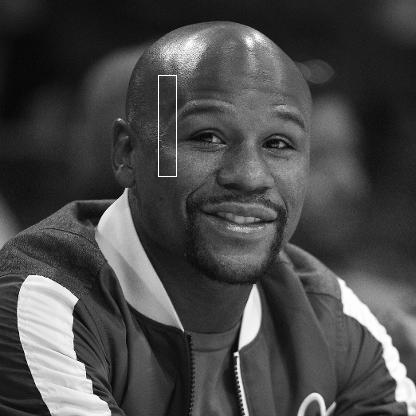

In [5]:
# Let's draw a rectangle around the face.
# First, convert the image to a PIL image
pil_image = Image.fromarray(gray_image, mode='L')

# Draw the rectangle
draw = ImageDraw.Draw(pil_image)
rectangle = faces.tolist()[0]
draw.rectangle(rectangle, outline='white')

# Display the image
display(pil_image)

The result is not very good. 

If we check the OpenCV docs, detectMultiScale() returns the coordinates of the detected faces as a rectangle. The first two numbers are the top left corner of the rectangle, and the next two numbers are the width and height (x,y,w,h), while PIL.ImageDraw.Draw.rectangle() expects the coordinates of the top left and bottom right corners of the rectangle (x,y,x+w,y+h). So we need to convert the coordinates before we can draw the rectangle.

Let's wrap all together.

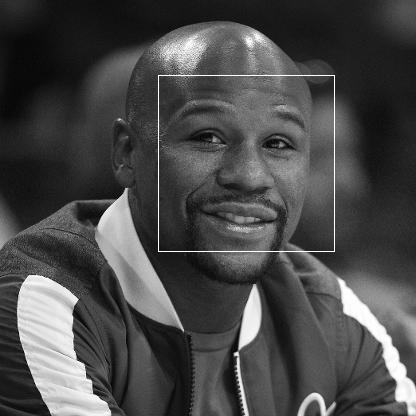

In [6]:
# Import OpenCV library and Image and ImageDraw libraries from PIL
import cv2 as cv
from PIL import Image, ImageDraw

# Load XML classifier
face_cascade = cv.CascadeClassifier('classifier/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('classifier/haarcascade_eye.xml')

# With the classifier loaded, we can now use it to detect faces in the image.
# Load the image and convert it to grayscale
image = cv.imread('images/floyd.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Use classifier to detect faces. This function returns a list of objects as rectangles. The first parameter is an ndarray of the image.
faces = face_cascade.detectMultiScale(gray_image)

# Let's draw a rectangle around the face.
# First, convert the image to a PIL image
pil_image = Image.fromarray(gray_image, mode='L')
# Draw the rectangle
draw = ImageDraw.Draw(pil_image)
rectangle = faces.tolist()[0]
draw.rectangle((rectangle[0], rectangle[1], rectangle[0]+rectangle[2], rectangle[1]+rectangle[3]), outline='white')

# Display the image
display(pil_image)

We see the face detection works pretty good on this image! Note that it's apparent that this is not head detection, but that the haarcascades file we used is looking for eyes and a mouth.

### Multiple Face Detection

Now let's try to detect faces in a group photo. We will use the same technique as before.